In [100]:
import create_dataset
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [101]:
acteurs, votes, scrutins = create_dataset.load_data()

In [111]:
df = scrutins.merge(votes, on='vote_uid')
df

,Unnamed: 0_x,parti,abstention,contre,pour,vote_uid,Unnamed: 0_y,vote_objet,vote_demandeur,vote_date,vote_jourSeance,vote_typeCode,vote_typeName,vote_typeMajorite
0,0,La France Insoumise,0.0,2.0,0.0,VTANR5L15V2827,0,l'amendement n° 2166 rectifié du Gouvernement ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,1,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
1,1,La République en Marche,3.0,11.0,41.0,VTANR5L15V2827,0,l'amendement n° 2166 rectifié du Gouvernement ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,1,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
2,2,Les Républicains,0.0,2.0,13.0,VTANR5L15V2827,0,l'amendement n° 2166 rectifié du Gouvernement ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,1,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
3,3,Mouvement Démocrate,0.0,2.0,6.0,VTANR5L15V2827,0,l'amendement n° 2166 rectifié du Gouvernement ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,1,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
4,4,Non rattachée,0.0,0.0,1.0,VTANR5L15V2827,0,l'amendement n° 2166 rectifié du Gouvernement ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,1,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,0,La République en Marche,0.0,45.0,0.0,VTANR5L15V660,0,l'amendement n° 1221 de Mme Verdier-Jouclas à ...,"Président du groupe ""Les Républicains""",2018-05-25,3,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
26382,1,Les Républicains,0.0,0.0,10.0,VTANR5L15V660,0,l'amendement n° 1221 de Mme Verdier-Jouclas à ...,"Président du groupe ""Les Républicains""",2018-05-25,3,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
26383,2,Mouvement Démocrate,2.0,6.0,0.0,VTANR5L15V660,0,l'amendement n° 1221 de Mme Verdier-Jouclas à ...,"Président du groupe ""Les Républicains""",2018-05-25,3,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés
26384,3,Non rattaché,0.0,1.0,0.0,VTANR5L15V660,0,l'amendement n° 1221 de Mme Verdier-Jouclas à ...,"Président du groupe ""Les Républicains""",2018-05-25,3,SPO,scrutin public ordinaire,majorité absolue des suffrages exprimés


In [103]:
 pd.pivot_table(df, values=['pour', 'contre', 'abstention'], index=['parti',"vote_objet"], aggfunc='sum')

abstention  \
parti                                      vote_objet                                                       
Calédonie Ensemble                         l'amendement de suppression n° 1280 de M. Avira...         0.0   
                                           l'amendement de suppression n° 157 de M. Gossel...         0.0   
                                           l'amendement de suppression n° 205 de M. Dharré...         0.0   
                                           l'amendement de suppression n° 2512 de la commi...         0.0   
                                           l'amendement de suppression n° 487 de Mme Guion...         0.0   
...                                                                                                   ...   
Union des démocrates, radicaux et libéraux les crédits de la mission Solidarité, insertion...         0.0   
                                           les crédits de la mission Sports, jeunesse et v...         0.0   
                                           les crédits de la mission Sécurités à l'article...         0.0   
                                           les crédits de la mission Écologie, développeme...         1.0   
                                           les crédits du compte spécial Avances à l'audio...         2.0   

                                                                                               contre  \
parti                                      vote_objet                                                   
Calédonie Ensemble                         l'amendement de suppression n° 1280 de M. Avira...     1.0   
                                           l'amendement de suppression n° 157 de M. Gossel...     1.0   
                                           l'amendement de suppression n° 205 de M. Dharré...     1.0   
                                           l'amendement de suppression n° 2512 de la commi...     0.0   
                                           l'amendement de suppression n° 487 de Mme Guion...     0.0   
...                                                                                               ...   
Union des démocrates, radicaux et libéraux les crédits de la mission Solidarité, insertion...     0.0   
                                           les crédits de la mission Sports, jeunesse et v...     0.0   
                                           les crédits de la mission Sécurités à l'article...     1.0   
                                           les crédits de la mission Écologie, développeme...     0.0   
                                           les crédits du compte spécial Avances à l'audio...     0.0   

                                                                                               pour  
parti                                      vote_objet                                                
Calédonie Ensemble                         l'amendement de suppression n° 1280 de M. Avira...   0.0  
                                           l'amendement de suppression n° 157 de M. Gossel...   0.0  
                                           l'amendement de suppression n° 205 de M. Dharré...   0.0  
                                           l'amendement de suppression n° 2512 de la commi...   1.0  
                                           l'amendement de suppression n° 487 de Mme Guion...   1.0  
...                                                                                             ...  
Union des démocrates, radicaux et libéraux les crédits de la mission Solidarité, insertion...   1.0  
                                           les crédits de la mission Sports, jeunesse et v...   1.0  
                                           les crédits de la mission Sécurités à l'article...   1.0  
                                           les crédits de la mission Écologie, développeme...   1.0  
                                           les crédits du compte spécial Avances à l'au

<AxesSubplot:xlabel='parti'>

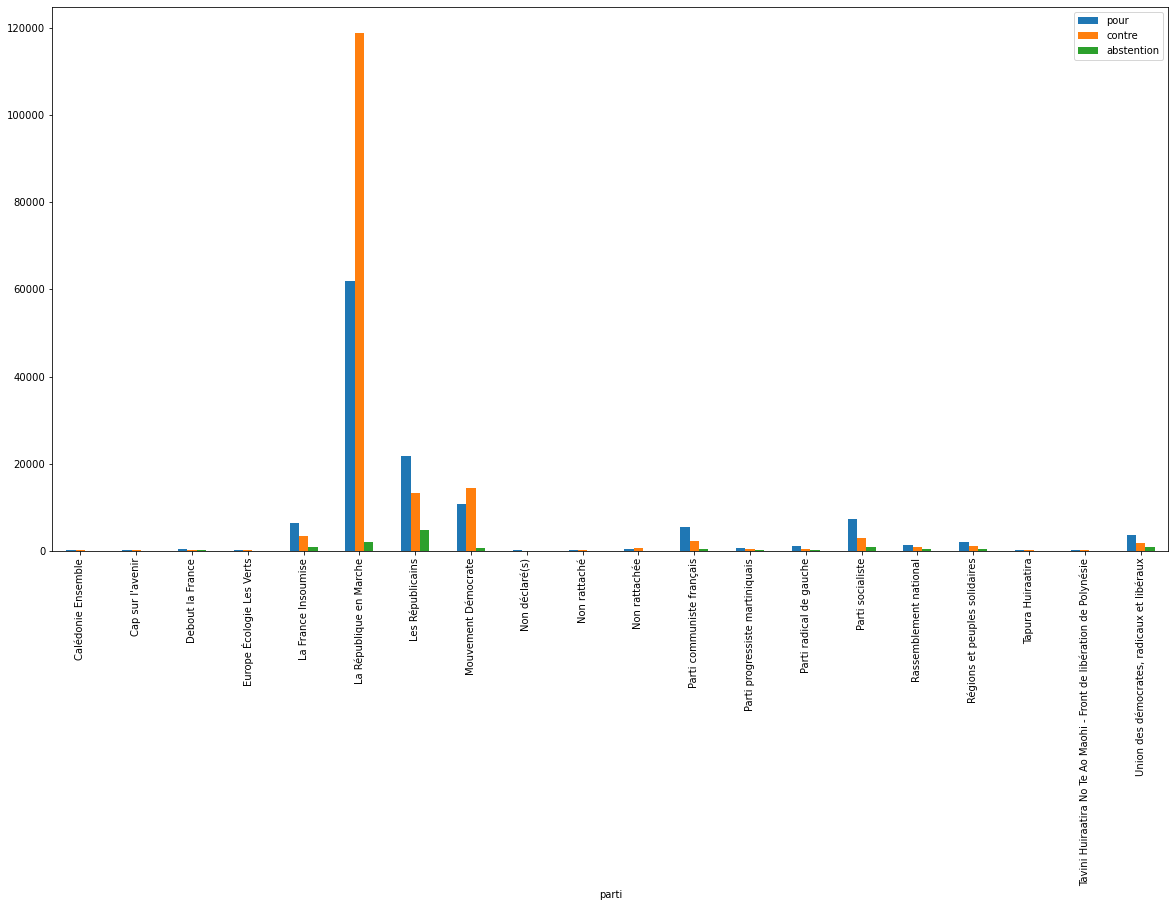

In [104]:
df.groupby("parti")[["pour","contre","abstention"]].sum().plot(kind="bar",figsize=(20,10))

array(["l'amendement n° 2166 ", "l'amendement de suppr",
       "l'article premier de ", ..., "l'amendement n° 1279 ",
       "l'amendement n° 2916 ", "l'amendement n° 1221 "], dtype=object)

In [82]:
data = df[["parti","abstention","pour","contre","vote_objet","vote_demandeur","vote_date","vote_uid"]]


#encodage partis
data['parti'] = data['parti'].str.replace('Non rattachée', 'Indépendant')
data['parti'] = data['parti'].str.replace('Non rattaché', 'Indépendant')
data['parti'] = data['parti'].str.replace('Non déclaré\(s\)', 'Indépendant')


#encodage demadeur
def find_parti_demandeur(txt):
    if type(txt) == str:
        groupe = re.findall('"(.*?)"', txt)
        #if len(groupe) > 1:
        #    print(groupe)
    else:
        # NaN value for txt
        groupe = []
    groupe = [clean_groupe_name(name) for name in groupe if clean_groupe_name(name) != ""]
    return groupe

def clean_groupe_name(txt):
    txt = txt.strip()
    # Add missing accents
    txt = txt.replace('Les Republicains', 'Les Républicains')
    txt = txt.replace("democrate et republicaine", "démocrate et républicaine")
    txt = txt.replace("Republique", "République")
    # Remove déterminants
    txt = txt.replace("de la Gauche démocrate et républicaine", "Gauche démocrate et républicaine")
    txt = txt.replace("du Mouvement Démocrate et apparentés", "Mouvement Démocrate et apparentés")
    # Add capital letter
    txt = txt.replace("UDI, Agir et indépendants", "UDI, Agir et Indépendants")
    # Remove non relevant text
    txt = txt.replace("President(e) du groupe", "")
    txt = txt.replace("\xa0", " ")
    
    return txt
    

data['demandeur_parti'] = data['vote_demandeur'].apply(find_parti_demandeur)
data = data.explode("demandeur_parti")




In [56]:
data

,parti,abstention,pour,contre,vote_objet,vote_demandeur,vote_date,demandeur_parti,target
0,La France Insoumise,0.0,0.0,2.0,6 rectifié du Gouvernement et les amendements ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,[UDI et Indépendants],contre
1,La République en Marche,3.0,41.0,11.0,6 rectifié du Gouvernement et les amendements ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,[UDI et Indépendants],pour
2,Les Républicains,0.0,13.0,2.0,6 rectifié du Gouvernement et les amendements ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,[UDI et Indépendants],pour
3,Mouvement Démocrate,0.0,6.0,2.0,6 rectifié du Gouvernement et les amendements ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,[UDI et Indépendants],pour
4,Indépendant,0.0,1.0,0.0,6 rectifié du Gouvernement et les amendements ...,"Président du groupe ""UDI et Indépendants""",2020-07-29,[UDI et Indépendants],pour
...,...,...,...,...,...,...,...,...,...
26381,La République en Marche,0.0,0.0,45.0,1 de Mme Verdier-Jouclas à l'article 11 du pro...,"Président du groupe ""Les Républicains""",2018-05-25,[Les Républicains],contre
26382,Les Républicains,0.0,10.0,0.0,1 de Mme Verdier-Jouclas à l'article 11 du pro...,"Président du groupe ""Les Républicains""",2018-05-25,[Les Républicains],pour
26383,Mouvement Démocrate,2.0,0.0,6.0,1 de Mme Verdier-Jouclas à l'article 11 du pro...,"Président du groupe ""Les Républicains""",2018-05-25,[Les Républicains],contre
26384,Indépendant,0.0,0.0,1.0,1 de Mme Verdier-Jouclas à l'article 11 du pro...,"Président du groupe ""Les Républicains""",2018-05-25,[Les Républicains],contre


# 2. Encodage de vote_objet

In [ ]:
weird_type_votes = []

# Liste établie "à la main"
types_votes = ["l'amendement", "le sous-amendement", "l'article", "l'ensemble du projet de loi", "l'ensemble de la proposition de loi", "la proposition de résolution", "l'ensemble de la proposition de résolution", "les crédits", "la motion référendaire", "la motion de renvoi en commission", "la motion de rejet préalable", "la motion d'ajournement", "la motion de censure", "la déclaration", "la première partie du projet de loi de finances", "la demande de"]

# TODO: (peut-être ??)
# Grouper : les motions 
# Grouper : amendement et sous-amendement 
# Grouper : l'ensemble du projet du loi, l'ensemble de la proposition de loi
# Grouper : la proposition de résolution, l'ensemble de la proposition de résolution

def find_type_vote(txt: str) -> str:
    if type(txt) == str:
        type_vote = "?"
        # Fix common typos
        txt = txt.replace("le sous-amendment", "le sous-amendement")
        txt = txt.replace("declaration", "déclaration")
        txt = txt.replace("la motion de renvoi en commision", "la motion de renvoi en commission")
        txt = txt.replace("le demande de", "la demande de")
        for t in types_votes:
            if txt.startswith(t):
                type_vote = t
                break
        if type_vote == "?":
            weird_type_votes.append(txt)
    else:
        type_vote = "?"
    return type_vote

df['vote_objet_type'] = df['vote_objet'].apply(find_type_vote)
df['vote_objet_type'].sample(10)

In [ ]:
weird_auteur_loi = []

def find_auteur_loi(txt: str) -> list:
    """
    Returns a list of

    ["M", "Last Name"] or ["M", "First Name", "Last Name"] or ["M", "de", "Last Name"]
    of the auteurs found
    OR
    ["Gouvernement"]
    if "du Gouvernement" found in txt

    """
    if type(txt) == str:
        # Match the two next word after "de M. XXX XXX"
        auteur = re.findall('[du?e?|par] (Mm?e?\.?) (.*?) (.*?),? ', txt)
        if auteur != []:
            if len(auteur) == 1:
                auteur = auteur[0]
            elif len(auteur) == 2 and txt.startswith("le sous-amend"):
                # In the case of sous-amendement, you may have 2 auteurs. Then, pick only the first auteur found. 
                auteur = auteur[0]
            else:
                # You may have several auteurs for motions as well. In this case, keep all the auteurs.
                pass
            # Sometimes you have (first_name, last_name), sometimes (last_name, stop_word). We keep only last nams. 
            stop_words = ["et", "à", "après", "", "avant"]
            auteur = [w for w in auteur if w not in stop_words]
        elif "du Gouvernement" in txt:
            auteur = ["Gouvernement"]
        else:
            auteur = []
            weird_auteur_loi.append(txt)
    else:
        # NaN value for txt
        auteur = []
    return auteur

df['vote_objet_auteur'] = df['vote_objet'].apply(find_auteur_loi)
df['vote_objet_auteur'].sample(10)

# creation des targets 

In [55]:
def create_target(x):
    idx = np.argmax([x["abstention"],x["pour"],x["contre"]])
    if(idx == 0 ):
        return "abstention"
    if(idx == 1 ):
        return "pour"
    if(idx == 2 ):
        return "contre"
data["target"] = data.apply(create_target,axis=1, result_type="expand") 
    

In [97]:
X = data[["parti","vote_demandeur","vote_objet","demandeur_parti"]]